In [60]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [61]:
#residential property descriptions -data
#make sale date in a readable format by using parse_date function
df=pd.read_csv('Residential_data.csv', 
               usecols=['OBJECTID','BATHRM','HEAT_D','AC','ROOMS','BEDRM','STORIES','SALEDATE','PRICE','LANDAREA','SALE_NUM','BLDG_NUM','STYLE_D','STRUCT_D','GRADE_D','CNDTN_D']
              ,parse_dates=["SALEDATE"])
df.head(2)

,OBJECTID,BATHRM,HEAT_D,AC,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,SALE_NUM,BLDG_NUM,STYLE_D,STRUCT_D,GRADE_D,CNDTN_D,LANDAREA
0,1001,4.0,Warm Cool,Y,8.0,4.0,3.0,2003-11-25,1095000.0,1,1,3 Story,Row Inside,Very Good,Good,1680
1,1002,3.0,Warm Cool,Y,11.0,5.0,3.0,2000-08-17,0.0,1,1,3 Story,Row Inside,Very Good,Good,1680


In [62]:
# let's first get the statistical information of numerical data for our data analysis
#Rooms has (107154 – 107110) 44 missing values.
#Bedroom has (107154 – 107123) 31 missing values.
#We can also say that some data doesnot has valid data where rooms,min bedrooms and stories are 0
df.describe()

,OBJECTID,BATHRM,ROOMS,BEDRM,STORIES,PRICE,SALE_NUM,BLDG_NUM,LANDAREA
count,45769.000000,45755.000000,45744.000000,45753.000000,45731.000000,3.876100e+04,45769.000000,45769.000000,45769.000000
mean,24009.014245,2.372353,7.831191,3.597797,2.231506,5.615252e+05,1.627346,1.001180,3723.288907
std,14376.834113,1.124804,2.405844,1.291378,4.445203,7.149979e+05,1.267527,0.036787,8660.822736
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000
25%,11443.000000,2.000000,6.000000,3.000000,2.000000,0.000000e+00,1.000000,1.000000,1400.000000
50%,22885.000000,2.000000,7.000000,3.000000,2.000000,4.550000e+05,1.000000,1.000000,2044.000000
75%,37063.000000,3.000000,9.000000,4.000000,2.500000,8.390000e+05,2.000000,1.000000,4888.000000
max,48505.000000,14.000000,48.000000,54.000000,826.000000,2.396029e+07,12.000000,3.000000,942632.000000


In [63]:
#df['HEAT_D'].hist(bins=50)

In [64]:
# For consistency ensure all columns label of string type
df.columns=list(map(str,df.columns))
df.shape #check the volume of data

(45769, 16)

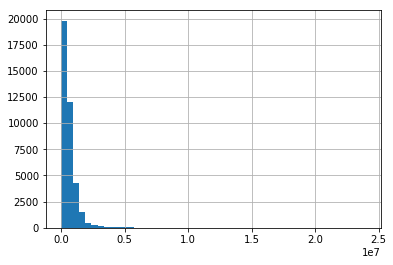

In [65]:
#here we can see some extreme values, 50 bins gives clear picture as compare to 10 bins
df['PRICE'].hist(bins=50)

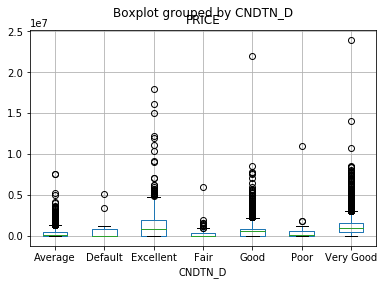

In [66]:
#we can see the distribution of prices based on the house condition
df.boxplot(column='PRICE',by='CNDTN_D')

In [67]:
 # number of missing values in each column before cleanup
df.apply(lambda x: sum(x.isnull()),axis=0)

OBJECTID       0
BATHRM        14
HEAT_D        14
AC            14
ROOMS         25
BEDRM         16
STORIES       38
SALEDATE       0
PRICE       7008
SALE_NUM       0
BLDG_NUM       0
STYLE_D       14
STRUCT_D      14
GRADE_D       14
CNDTN_D       14
LANDAREA       0
dtype: int64

In [68]:
print(df.CNDTN_D.unique())
print(df.AC.unique())

['Good' 'Very Good' 'Average' 'Fair' 'Excellent' 'Poor' nan 'Default']
['Y' 'N' nan '0']


In [69]:
#check which rows has null values for Condition columns 
df[df.CNDTN_D.isnull()]

,OBJECTID,BATHRM,HEAT_D,AC,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,SALE_NUM,BLDG_NUM,STYLE_D,STRUCT_D,GRADE_D,CNDTN_D,LANDAREA
1186,3187,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01,0.0,1,1,NaN,NaN,NaN,NaN,2641
1187,3188,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01,0.0,1,1,NaN,NaN,NaN,NaN,4959
4001,2002,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01,0.0,1,1,NaN,NaN,NaN,NaN,7840
16303,16304,NaN,NaN,NaN,NaN,NaN,NaN,2005-01-11,700000.0,1,1,NaN,NaN,NaN,NaN,3167
18784,18785,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01,0.0,1,1,NaN,NaN,NaN,NaN,1477
38997,41734,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01,0.0,1,1,NaN,NaN,NaN,NaN,658
38998,41735,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01,0.0,1,1,NaN,NaN,NaN,NaN,469
38999,41736,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01,0.0,1,1,NaN,NaN,NaN,NaN,699
39000,41737,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01,0.0,1,1,NaN,NaN,NaN,NaN,747
39001,41738,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01,0.0,1,1,NaN,NaN,NaN,NaN,888


In [137]:
# All the columns has NaN means, it is bad data. so lets remove that first before analyzing the data
# drop the rows where all values are missing
df.dropna(how='all')
# Keep only the rows with at least 8 non-NA values.
df_clean=df.dropna(thresh=8)
df_clean[df_clean.CNDTN_D.isnull()]

,OBJECTID,BATHRM,HEAT_D,AC,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,SALE_NUM,BLDG_NUM,STYLE_D,STRUCT_D,GRADE_D,CNDTN_D,LANDAREA


In [138]:
 # number of missing values in each column After cleanup
df_clean.apply(lambda x: sum(x.isnull()),axis=0)

OBJECTID       0
BATHRM         0
HEAT_D         0
AC             0
ROOMS         11
BEDRM          2
STORIES       24
SALEDATE       0
PRICE       7008
SALE_NUM       0
BLDG_NUM       0
STYLE_D        0
STRUCT_D       0
GRADE_D        0
CNDTN_D        0
LANDAREA       0
dtype: int64

In [93]:
#checking the clean data now
print(df_clean.CNDTN_D.unique())
print(df_clean.AC.unique())
#print(df_clean.PRICE.unique())

['Good' 'Very Good' 'Average' 'Fair' 'Excellent' 'Poor' 'Default']
['Y' 'N' '0']
[1095000.       0. 2100000. ...  821500.  308832.  746990.]


In [94]:
df1 = df_clean['CNDTN_D'].value_counts(ascending=True)
df2 = df_clean.pivot_table(values='AC',index=['CNDTN_D'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for House condition:') 
print (df1)

print ('\nProbility of a house having an AC based on house condition:')
print (df2)

Frequency Table for House condition:
Default         16
Poor            43
Fair           468
Excellent      647
Very Good     3733
Average      19926
Good         20922
Name: CNDTN_D, dtype: int64

Probility of a house having an AC based on house condition:
                 AC
CNDTN_D            
Average    0.517127
Default    0.000000
Excellent  0.989181
Fair       0.293362
Good       0.867409
Poor       0.190476
Very Good  0.974277


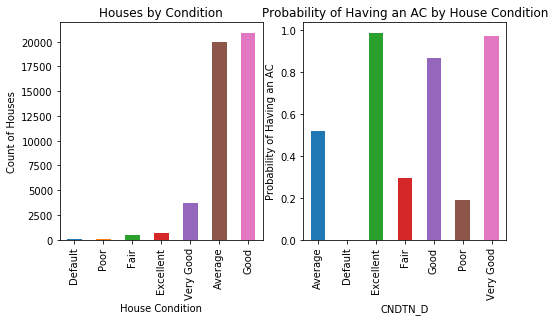

In [74]:
# Note that all integers must be less than 10 for this subplot form to work.
# subplot(nrows, ncols, index, **kwargs)
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
#fig.suptitle("Analysis of Having an AC by House Condition", fontsize=14)
ax1 = fig.add_subplot(121)
ax1.set_xlabel('House Condition')
ax1.set_ylabel('Count of Houses')
ax1.set_title("Houses by Condition")
df1.plot(kind='bar') # df1 is a 1-dimensional panda series

ax2 = fig.add_subplot(122)
ax2.set_xlabel('House Condition')
ax2.set_ylabel('Probability of Having an AC')
ax2.set_title("Probability of Having an AC by House Condition")
df2 = df2.squeeze() #to downcast df2 dataframe into a 1-dimensional series
df2.plot(kind = 'bar')

In [139]:
# fill the missing value and zero price of the prices with the mean of prices
df_clean['PRICE'].fillna(df_clean['PRICE'].mean(skipna=True),inplace=True)
#df_clean['PRICE']=df_clean['PRICE'].fillna(df_clean['PRICE'].mean(skipna=True))
#price_mean=df_clean['PRICE'].mean()
df_clean.loc[df_clean.PRICE == 0, ['PRICE'] ]= price_mean
df_clean.head(5)


c:\users\ashu\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
c:\users\ashu\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,OBJECTID,BATHRM,HEAT_D,AC,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,SALE_NUM,BLDG_NUM,STYLE_D,STRUCT_D,GRADE_D,CNDTN_D,LANDAREA
0,1001,4.0,Warm Cool,Y,8.0,4.0,3.0,2003-11-25,1.095000e+06,1,1,3 Story,Row Inside,Very Good,Good,1680
1,1002,3.0,Warm Cool,Y,11.0,5.0,3.0,2000-08-17,5.617100e+05,1,1,3 Story,Row Inside,Very Good,Good,1680
2,1003,3.0,Hot Water Rad,Y,9.0,5.0,3.0,2016-06-21,2.100000e+06,3,1,3 Story,Row Inside,Very Good,Very Good,1680
3,1004,3.0,Hot Water Rad,Y,8.0,5.0,3.0,2006-07-12,1.602000e+06,1,1,3 Story,Row Inside,Very Good,Good,1680
4,1005,2.0,Warm Cool,Y,11.0,3.0,3.0,1900-01-01,5.617100e+05,1,1,3 Story,Semi-Detached,Very Good,Good,2032


In [105]:
#Missing values for price will be zero now
df_clean.apply(lambda x: sum(x.isnull()),axis=0)

OBJECTID     0
BATHRM       0
HEAT_D       0
AC           0
ROOMS       11
BEDRM        2
STORIES     24
SALEDATE     0
PRICE        0
SALE_NUM     0
BLDG_NUM     0
STYLE_D      0
STRUCT_D     0
GRADE_D      0
CNDTN_D      0
LANDAREA     0
dtype: int64

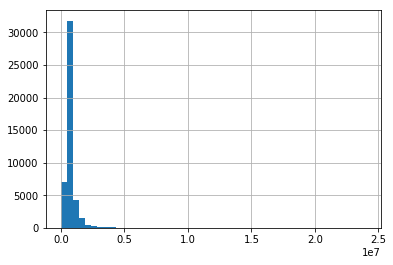

In [107]:
# outliers value of price
df_clean['PRICE'].hist(bins=50)

In [140]:
import datetime as dt
#pd.to_datetime(df_clean['SALEDATE']).dt.year
#df_clean['sale_year'] =df_clean['SALEDATE'].dt.year
df_clean['sale_year'] = df_clean['SALEDATE'].apply(lambda a: a.year)
df_clean

c:\users\ashu\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,OBJECTID,BATHRM,HEAT_D,AC,ROOMS,BEDRM,STORIES,SALEDATE,PRICE,SALE_NUM,BLDG_NUM,STYLE_D,STRUCT_D,GRADE_D,CNDTN_D,LANDAREA,sale_year
0,1001,4.0,Warm Cool,Y,8.0,4.0,3.0,2003-11-25,1.095000e+06,1,1,3 Story,Row Inside,Very Good,Good,1680,2003
1,1002,3.0,Warm Cool,Y,11.0,5.0,3.0,2000-08-17,5.617100e+05,1,1,3 Story,Row Inside,Very Good,Good,1680,2000
2,1003,3.0,Hot Water Rad,Y,9.0,5.0,3.0,2016-06-21,2.100000e+06,3,1,3 Story,Row Inside,Very Good,Very Good,1680,2016
3,1004,3.0,Hot Water Rad,Y,8.0,5.0,3.0,2006-07-12,1.602000e+06,1,1,3 Story,Row Inside,Very Good,Good,1680,2006
4,1005,2.0,Warm Cool,Y,11.0,3.0,3.0,1900-01-01,5.617100e+05,1,1,3 Story,Semi-Detached,Very Good,Good,2032,1900
5,1006,3.0,Hot Water Rad,Y,10.0,5.0,4.0,2010-02-26,1.950000e+06,1,1,4 Story,Row Inside,Very Good,Good,2196,2010
6,1007,1.0,Warm Cool,Y,5.0,2.0,2.0,2011-05-02,5.617100e+05,1,1,2 Story,Row Inside,Above Average,Average,1261,2011
7,1008,3.0,Hot Water Rad,Y,8.0,4.0,3.0,2011-09-29,1.050000e+06,1,1,3 Story,Row Inside,Very Good,Average,1627,2011
8,1009,3.0,Warm Cool,Y,7.0,3.0,2.0,2018-05-03,1.430000e+06,4,1,2 Story,Row Inside,Above Average,Very Good,1424,2018
9,1010,1.0,Hot Water Rad,Y,6.0,2.0,2.0,2008-12-05,5.617100e+05,1,1,2 Story,Row Inside,Good Quality,Average,1424,2008


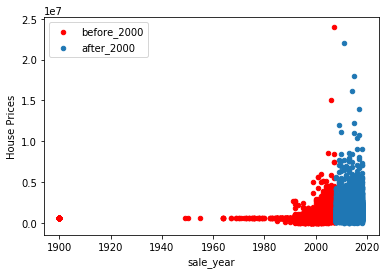

In [147]:
before_2000 = df_clean[df_clean['sale_year'] < 2008]
after_2000  = df_clean[df_clean['sale_year']>= 2008]

# Plot yearly housing prices before and after 2008 year
ax=before_2000.plot(x='sale_year',y='PRICE',kind='scatter',label='before_2000',c='r')
after_2000.plot(x='sale_year',y='PRICE',kind='scatter',ax=ax,label='after_2000')
ax.set_ylabel('House Prices')
plt.show()

In [ ]:
# find the correlation between 